In [1]:
import pandas as pd

In [50]:
df = pd.DataFrame()

In [51]:
df["outlook"] = ["sunny", "sunny", "overcast", "rainy", "rainy", "rainy", "overcast", "sunny", "sunny", "rainy", "sunny", "overcast", "overcast", "rainy"]

In [52]:
df["Temperature"] = ["hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild", "cool", "mild", "mild", "mild", "hot", "mild"]

In [53]:
df["Humidity"] = ["high", "high", "high", "high", "normal", "normal", "normal", "high", "normal", "normal", "normal", "high", "normal", "high"]

In [54]:
df["Windy"] = ["false", "true", "false", "false", "false", "true", "true", "false", "false", "false", "true", "true", "false", "true"]

In [55]:
df["Play"] = ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]

In [56]:
df.shape

(14, 5)

In [57]:
encoded_df = pd.get_dummies(df.iloc[:, :-1])
encoded_df["Play"] = df["Play"]
encoded_df

,outlook_overcast,outlook_rainy,outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true,Play
0,0,0,1,0,1,0,1,0,1,0,no
1,0,0,1,0,1,0,1,0,0,1,no
2,1,0,0,0,1,0,1,0,1,0,yes
3,0,1,0,0,0,1,1,0,1,0,yes
4,0,1,0,1,0,0,0,1,1,0,yes
5,0,1,0,1,0,0,0,1,0,1,no
6,1,0,0,1,0,0,0,1,0,1,yes
7,0,0,1,0,0,1,1,0,1,0,no
8,0,0,1,1,0,0,0,1,1,0,yes
9,0,1,0,0,0,1,0,1,1,0,yes


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtc = DecisionTreeClassifier(criterion = "entropy")

In [80]:
X = encoded_df = pd.get_dummies(df.iloc[:, :-1])
X

,outlook_overcast,outlook_rainy,outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [81]:
y = df["Play"]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [82]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [168]:
training_data = pd.concat([X_train, y_train], axis = 1)
training_data

,outlook_overcast,outlook_rainy,outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true,Play
2,1,0,0,0,1,0,1,0,1,0,yes
10,0,0,1,0,0,1,0,1,0,1,yes
5,0,1,0,1,0,0,0,1,0,1,no
11,1,0,0,0,0,1,1,0,0,1,yes
13,0,1,0,0,0,1,1,0,0,1,no
1,0,0,1,0,1,0,1,0,0,1,no
0,0,0,1,0,1,0,1,0,1,0,no
4,0,1,0,1,0,0,0,1,1,0,yes
9,0,1,0,0,0,1,0,1,1,0,yes


In [169]:
training_data["Play"].value_counts()

yes    5
no     4
Name: Play, dtype: int64

In [170]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [171]:
y_pred = dtc.predict(X_test)
y_pred

array(['no', 'no', 'yes', 'yes', 'yes'], dtype=object)

In [194]:
list(training_data["Play"])

['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes']

[Text(0.6666666666666666, 0.9, 'outlook_overcast <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = yes'),
 Text(0.5, 0.7, 'Humidity_high <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = yes'),
 Text(0.3333333333333333, 0.5, 'Windy_true <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = yes'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes'),
 Text(0.5, 0.3, 'outlook_rainy <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.6666666666666666, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = yes'),
 Text(0.8333333333333334, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = yes')]

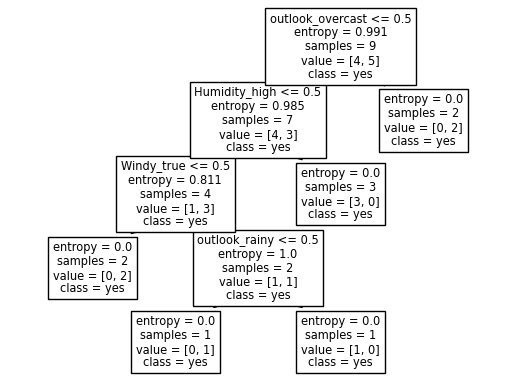

In [200]:
from sklearn.tree import plot_tree
plot_tree(dtc,feature_names = list(training_data.columns),class_names=['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes'])

In [199]:
y_test

3     yes
7      no
12    yes
6     yes
8     yes
Name: Play, dtype: object

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix

array([[1, 0],
       [1, 3]], dtype=int64)

In [176]:
import seaborn as sns


<Axes: >

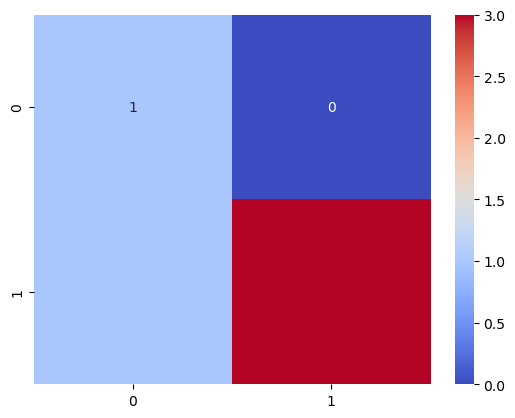

In [177]:
sns.heatmap(confusionMatrix, annot = True, cmap = 'coolwarm')

In [109]:
from sklearn.metrics import classification_report

In [113]:
Class_report = classification_report(y_test, y_pred, output_dict = False)
print(Class_report)

              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

